In [23]:
# Importing the Velkoz signal processing library:
from signal_processing.core_signal_objects import AudioSignal
import librosa
import librosa.display

# Importing data manipulation packages:
import pandas as pd
import numpy as np

# Importing visualization packages:
import matplotlib.pyplot as plt

In [2]:
"Extracting wav audio files from the ESC-50 Dataset:"

# Extracting the ESC-50 csv file with audio file data labels:
esc50_metadata = pd.read_csv("../data/ESC-50-master/meta/esc50.csv")
audio_file_dir_path = "../data/ESC-50-master/audio"

# A Dog audio sound:
test_dog_path = audio_file_dir_path + f"/{esc50_metadata['filename'][0]}"
print(test_dog_path)

# Creating AudioSignal and performing all data transformations on it:
dog_signal = AudioSignal("../data/ESC-50-master/audio/1-100032-A-0.wav") 
dog_signal._perform_short_term_feature_extraction()
dog_signal._calculate_short_term_fourier_transform(2048)

../data/ESC-50-master/audio/1-100032-A-0.wav


[0.00000000e+00 2.15332031e+01 4.30664062e+01 ... 2.20069336e+04
 2.20284668e+04 2.20500000e+04] <class 'numpy.ndarray'> (1025,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] <class 'numpy.ndarray'> (1025, 216)


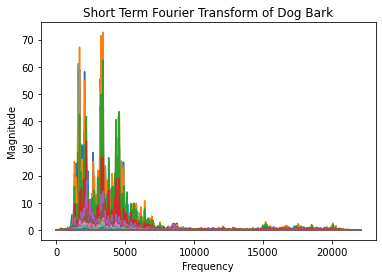

In [17]:
# Exploring the frequency and magnitude stft data:
print(dog_signal.stft_frequency, type(dog_signal.stft_frequency), dog_signal.stft_frequency.shape)    
print(dog_signal.stft_magnitude, type(dog_signal.stft_magnitude), dog_signal.stft_magnitude.shape)
"""for x in dog_signal.stft_magnitude:
    print(type(x), x.shape, len(x))  
"""

# Plotting the STFT:
plt.plot(dog_signal.stft_frequency, dog_signal.stft_magnitude)
plt.title("Short Term Fourier Transform of Dog Bark")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

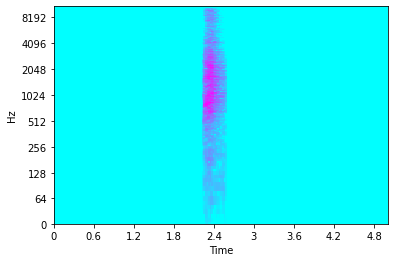

In [26]:
# Converting magniture to logarithmic decibal scale:
db_magnitude = librosa.amplitude_to_db(dog_signal.stft_magnitude, ref=np.max)

# Plotting the spectogram:
librosa.display.specshow(
    db_magnitude,
    sr = dog_signal.sampling_rate,
    hop_length = dog_signal.hop_length,
    x_axis = "time",
    y_axis = "log",
    cmap = "cool")
